# **Drive Link for Data:**
https://drive.google.com/drive/folders/1b6Y83sSfFAtd5grDng3PH5dx9fvbZV1Z?usp=sharing_eil_se_dm&ts=654938a5

# Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Uploading Data into colab

In [ ]:
## 1. DIRECT UPLOAD FROM SYSTEM
from google.colab import files
uploaded  = files.upload()

In [ ]:
## 2. UPLOADING FILE FROM DRIVE
from google.colab import drive
mount = "/content/gdrive"
drive.mount(mount)
drive_root = mount + "/My Drive/Data Science"
%cd $drive_root
import os
os.listdir()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Data Science


['Data.csv']

# Creating DataFrame from the data

In [ ]:
df = pd.read_csv('Data.csv')
##df = df.set_index('Index')
df

,Index,R2,thrustBm,thrustOm,cosTBTO,cosTBz,KSFWVariables__boet__bc,KSFWVariables__bomm2__bc,CleoConeCS__bo1__bc,CleoConeCS__bo2__bc,...,KSFWVariables__bohoo2__cmFS1__bc,KSFWVariables__bohoo3__cmFS1__bc,KSFWVariables__bohoo4__cmFS1__bc,foxWolframR1,foxWolframR2,foxWolframR3,foxWolframR4,thrust,thrustAxisCosTheta,type
0,0,0.152200,0.818042,0.678908,0.925376,0.641596,5.492738,7.326161,0.062815,0.923991,...,-0.000648,-0.000956,0.003297,0.315513,0.257067,0.165595,0.099685,0.766103,0.584374,1
1,1,0.122531,0.847877,0.661546,0.203175,0.960107,3.548602,5.346302,0.000000,2.317477,...,-0.004079,0.000975,-0.010682,0.699070,0.425364,0.337010,0.357491,0.842736,0.960207,1
2,2,0.071109,0.823682,0.659284,0.586194,0.667930,7.739933,-1.734496,0.393218,0.061572,...,-0.002341,-0.002249,-0.000644,0.351783,0.278459,0.247533,0.171277,0.773620,0.723453,1
3,3,0.123307,0.849041,0.713995,0.343100,0.599684,6.336428,5.429208,0.000000,0.000000,...,-0.001151,-0.000096,0.003249,0.616451,0.581567,0.504908,0.313320,0.906921,0.631777,1
4,4,0.128661,0.850345,0.700636,0.598284,0.751411,7.520575,-1.092915,0.105494,0.789670,...,0.004459,-0.001671,-0.000072,0.099653,0.368981,0.190910,0.247606,0.824495,0.589225,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70601,615428,0.341170,0.822778,0.905524,0.744942,0.883310,5.254729,2.711209,0.229089,0.000000,...,0.007728,-0.003148,0.013386,0.240637,0.320524,0.114465,0.172375,0.789952,0.865978,2
70602,1046333,0.431197,0.890331,0.851992,0.979008,0.270003,10.016900,-1.206864,0.000000,4.097687,...,0.063099,-0.006214,0.009684,0.254839,0.436554,0.169985,0.252282,0.861856,-0.084869,2
70603,772073,0.345012,0.897968,0.745580,0.974656,0.691979,8.154435,-0.880221,4.716620,1.190169,...,0.026411,0.000968,0.004867,0.089218,0.603980,0.223313,0.441302,0.903512,0.689248,2
70604,1418852,0.240343,0.910267,0.698762,0.960566,0.441567,9.145159,-9.401502,2.592608,0.548217,...,0.020226,-0.006749,0.021568,0.406443,0.524733,0.335748,0.384065,0.868288,-0.230441,2


**EXTRACTING DATA FEATURES AND CLASSIFICATION OF DIFFERENT EVENT TYPES AS SIGNAL OR BACKGROUND**

In [ ]:
## We are assigning the values 1(Signal) to flags 0,1  and the value 0(Background) to flags 2,3,4,5
X = np.array(df.iloc[:,0:-1])
Y = np.array(df.iloc[:,-1])
print(Y)
signal = [0,1]
back = [2,3,4,5]
for i in range(0,len(Y)):
  if Y[i] in signal:
    Y[i] = 1
  if Y[i] in back:
    Y[i] = 0
print(Y)

[1 1 1 ... 2 2 2]
[1 1 1 ... 0 0 0]


# CREATING A MODEL USING LOGISTIC REGRESSION

In [ ]:
## Importing the Required libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
## Seperating the Data into training and testing Datasets
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25, random_state=0)

## Standardizing the Data to 0 mean and 1 variance
stan = preprocessing.StandardScaler()
xtrain = stan.fit_transform(xtrain)
xtest = stan.transform(xtest)

## Creating and Training the Model
Model = linear_model.LogisticRegression(random_state=0)
Model.fit(xtrain,ytrain)

## Testing the trained model
ypredict =  Model.predict(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[8494  337]
 [  88 8733]]


<Axes: >

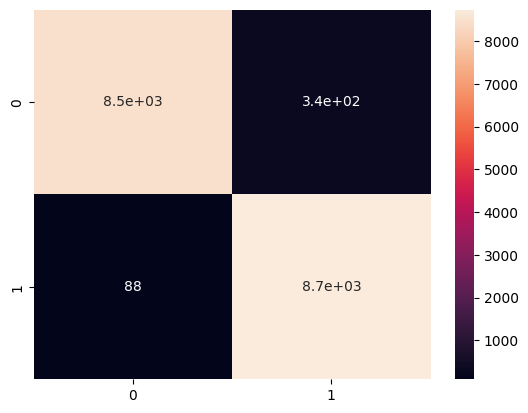

In [ ]:
## Creating a Confusion Matrix of Model's predictions and visualizing it using a Heatmap
con_mat = confusion_matrix(ytest, ypredict)
print(con_mat)
sns.heatmap(pd.DataFrame(con_mat), annot=True)

In [ ]:
## Accuracy and Classification Report
log_Acc = accuracy_score(ytest,ypredict)*100
report = classification_report(ytest,ypredict)
print("Accuracy of the Model is: ",round(log_Acc,3),'%')
print("Classification Report: ")
print(report)

Accuracy of the Model is:  97.592 %
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8831
           1       0.96      0.99      0.98      8821

    accuracy                           0.98     17652
   macro avg       0.98      0.98      0.98     17652
weighted avg       0.98      0.98      0.98     17652



19 21
19 21


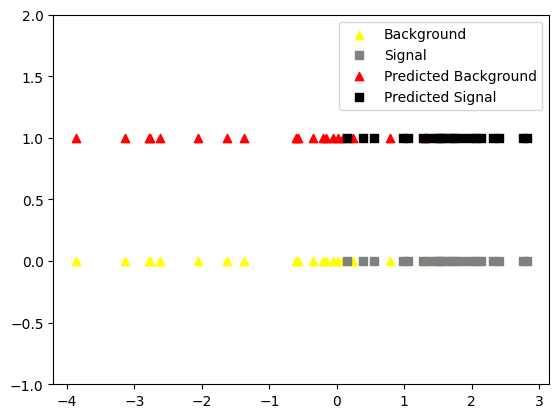

In [ ]:
## Visualizing the Model's Predictions


lda= LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(xtest,ytest)
indices = []
for i in range(0,len(X_lda)):
  indices.append(i)
indices = random.sample(indices,40)             ## We are selecting 40 data points at random to avoid crowding in the plots
X_lda_plot,ytest_plot,ypredict_plot = [],[],[]
for ind in indices:
  X_lda_plot.append(X_lda[ind])
  ytest_plot.append(ytest[ind])
  ypredict_plot.append(ypredict[ind])

Xpz = []
Xp1 = []
for j in range(0,len(ytest_plot)):
  if ytest_plot[j] == 0:
    Xpz.append(X_lda_plot[j])
  if ytest_plot[j] == 1:
    Xp1.append(X_lda_plot[j])
print(len(Xpz),len(Xp1))
plt.scatter(Xpz, np.zeros(len(Xpz)), marker='^',label='Background', color='yellow')
plt.scatter(Xp1, np.zeros(len(Xp1)),  marker='s',label='Signal', color='grey')
plt.legend()

Xpz = []
Xp1 = []
for j in range(0,len(ypredict_plot)):
  if ypredict_plot[j] == 0:
    Xpz.append(X_lda_plot[j])
  if ypredict_plot[j] == 1:
    Xp1.append(X_lda_plot[j])
print(len(Xpz),len(Xp1))
plt.scatter(Xpz, np.ones(len(Xpz)), marker='^',label='Predicted Background', color='red')
plt.scatter(Xp1, np.ones(len(Xp1)),  marker='s',label='Predicted Signal', color='black')
plt.ylim(-1,2)
plt.legend()

**=> Trend of Model's Accuracy with size of Testing_Data**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

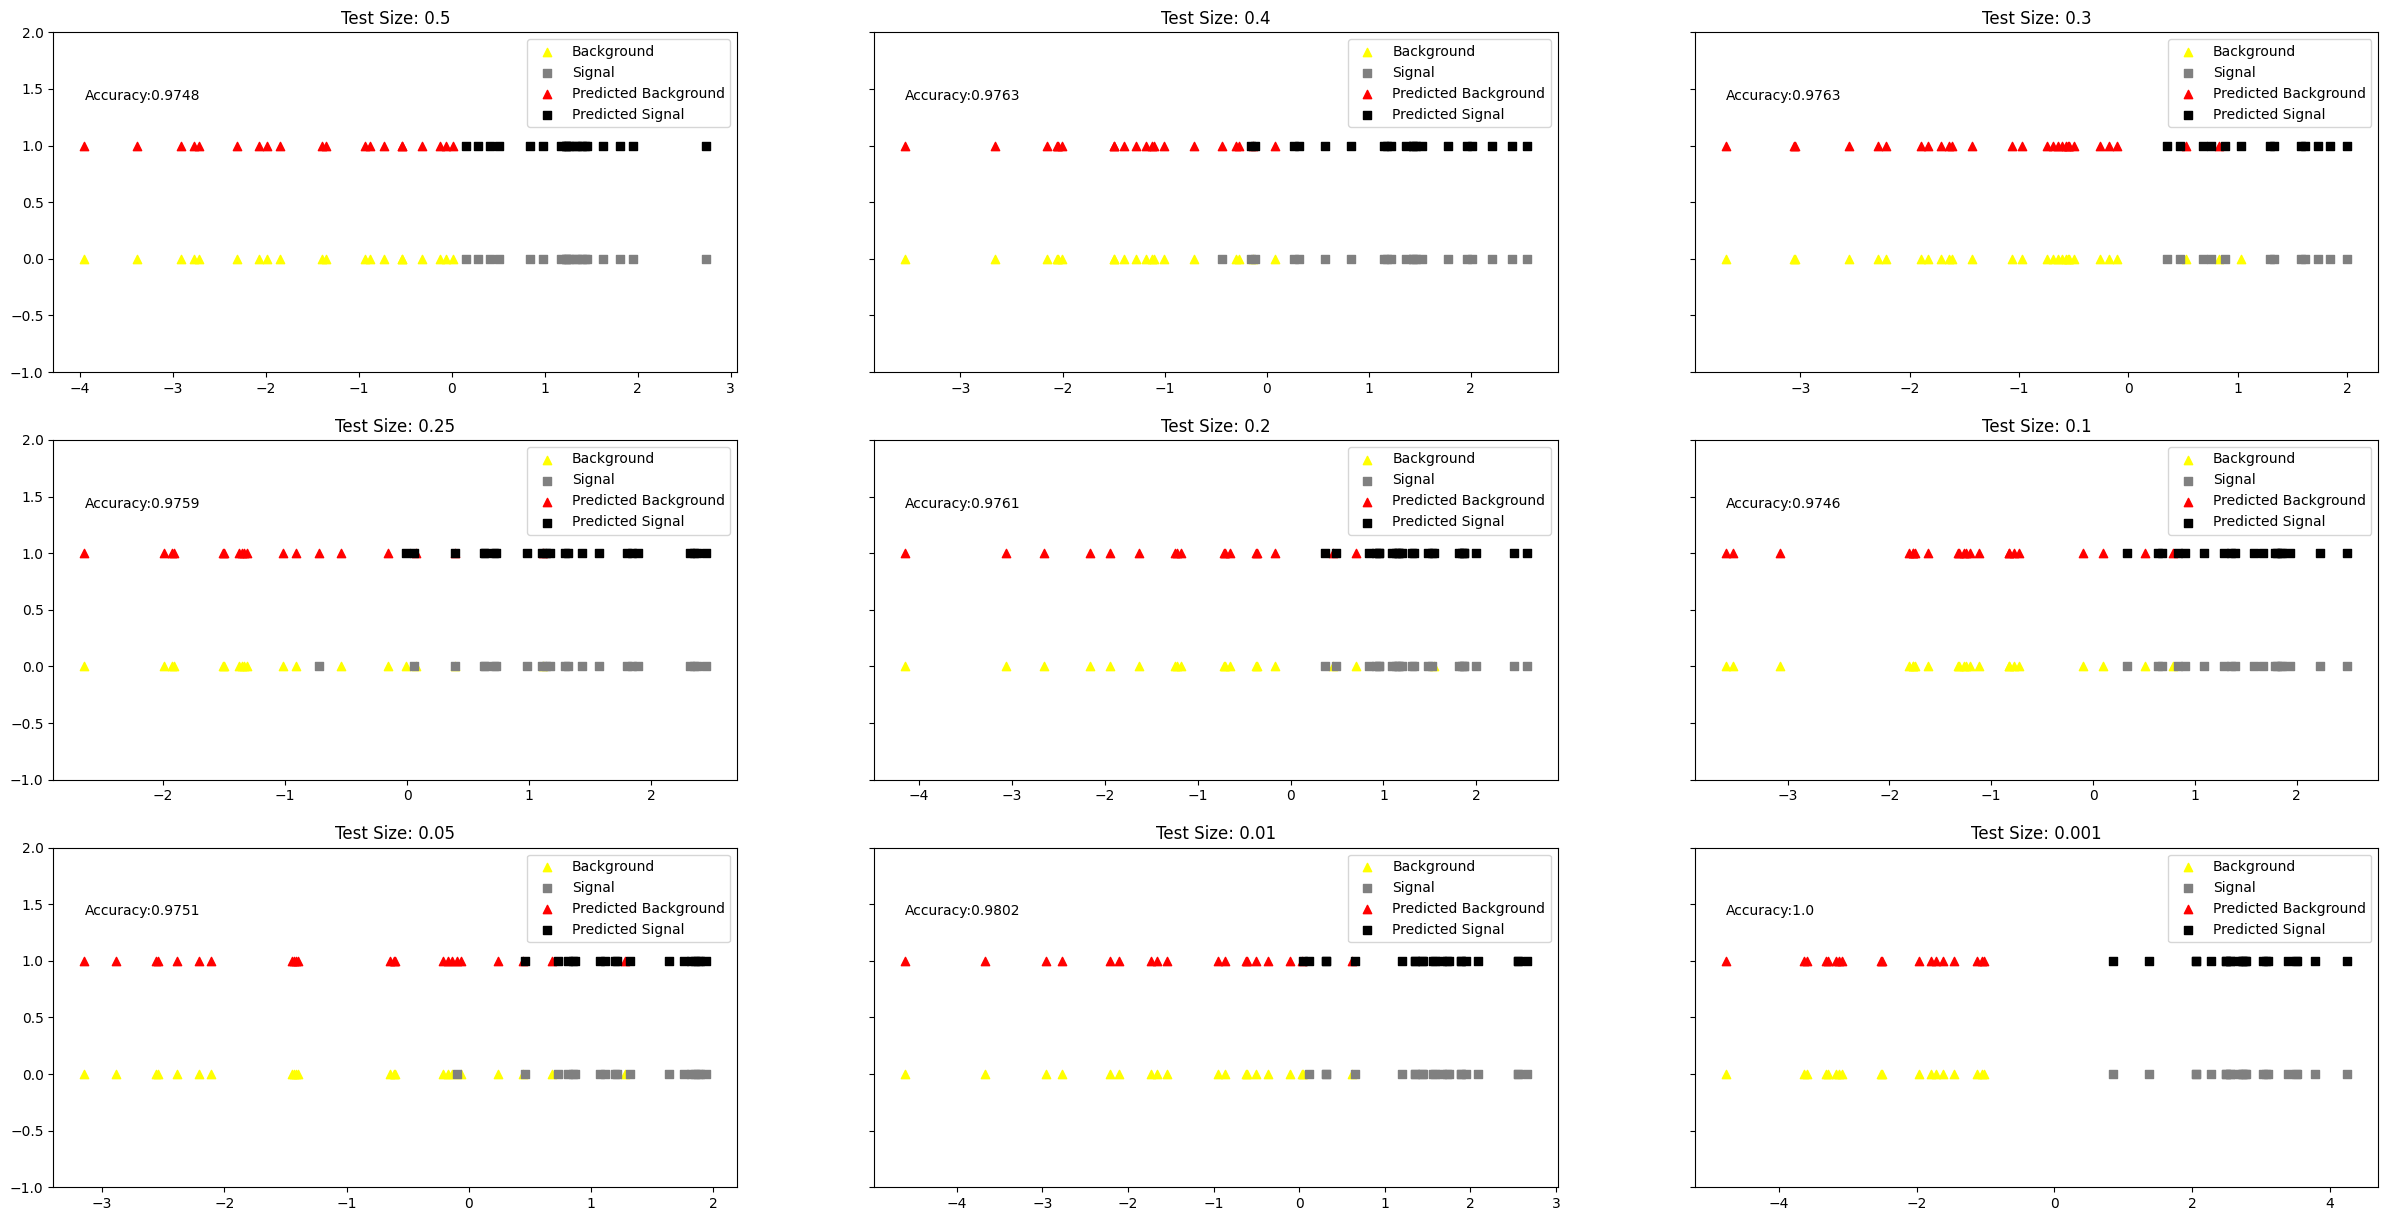

Text(0, 0.5, 'Accuracy')

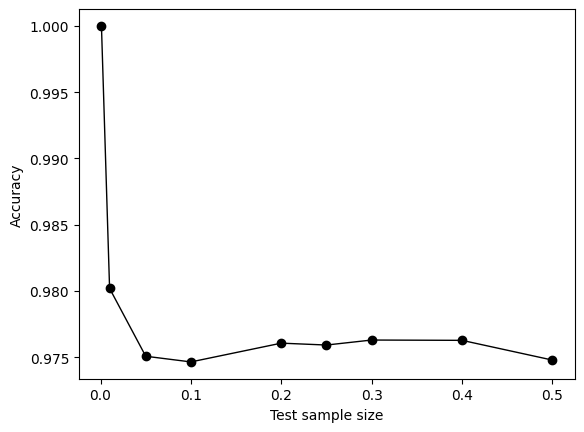

In [ ]:
## We are checking accuracy for six different testing sizes

Accuracy = []
##Acc = np.arange(0.001,0.25,0.01)
Acc = [0.5,0.4,0.3,0.25,0.2,0.1,0.05,0.01,0.001]
fig,axes = plt.subplots(3,3,figsize=(30,15),sharey=True)
ax = axes.flat
for k, acc in enumerate(Acc):
  xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=acc, random_state=0)
  sc_x = preprocessing.StandardScaler()
  xtrain = sc_x.fit_transform(xtrain)
  xtest = sc_x.transform(xtest)
  classifier = linear_model.LogisticRegression(random_state=0)
  classifier.fit(xtrain,ytrain)
  y_predict=  classifier.predict(xtest)
  accuracy = accuracy_score(ytest, y_predict)
  Accuracy.append(accuracy)
  lda= LinearDiscriminantAnalysis()
  X_lda = lda.fit_transform(xtest,ytest)
  indices = []
  for i in range(0,len(X_lda)):
    indices.append(i)
  indices = random.sample(indices,40)
  X_lda_plot,ytest_plot,y_predict_plot = [],[],[]
  for ind in indices:
    X_lda_plot.append(X_lda[ind])
    ytest_plot.append(ytest[ind])
    y_predict_plot.append(y_predict[ind])

  Xpz = []
  Xp1 = []
  for j in range(0,len(ytest_plot)):
    if ytest_plot[j] == 0:
      Xpz.append(X_lda_plot[j])
    if ytest_plot[j] == 1:
      Xp1.append(X_lda_plot[j])
  ax[k].scatter(Xpz, np.zeros(len(Xpz)), marker='^',label='Background', color='yellow')
  ax[k].scatter(Xp1, np.zeros(len(Xp1)),  marker='s',label='Signal', color='grey')
  ax[k].legend()

  Xpz = []
  Xp1 = []
  for j in range(0,len(y_predict_plot)):
    if y_predict_plot[j] == 0:
      Xpz.append(X_lda_plot[j])
    if y_predict_plot[j] == 1:
      Xp1.append(X_lda_plot[j])
  ax[k].scatter(Xpz, np.ones(len(Xpz)), marker='^',label='Predicted Background', color='red')
  ax[k].scatter(Xp1, np.ones(len(Xp1)),  marker='s',label='Predicted Signal', color='black')
  ax[k].set_ylim(-1,2)
  ax[k].legend()
  ax[k].set_title('Test Size: '+str(acc))
  s = 'Accuracy:'+str(round(accuracy,4))
  ax[k].text(min(Xpz),1.5,s,verticalalignment='top',horizontalalignment='left')
plt.show()
plt.tight_layout()
plt.plot(Acc,Accuracy, marker='o', color='black',lw = 1)
plt.xlabel('Test sample size')
plt.ylabel('Accuracy')

# Reducing Data Features using Linear Discriminant Analysis(LDA)

In [ ]:
## Since we have only 2 classes i.e. Signal and Background, LDA can reduce to maximum of 1 feature only

red_xtrain, red_xtest, red_ytrain, red_ytest = train_test_split(X,Y,test_size=0.25, random_state=0)
red_stan = preprocessing.StandardScaler()
red_xtrain = red_stan.fit_transform(red_xtrain)
red_xtest = red_stan.transform(red_xtest)

lda_new = LinearDiscriminantAnalysis()
red_train_Data = lda_new.fit_transform(red_xtrain,red_ytrain)
red_test_Data = lda_new.transform(red_xtest)


# Performing Logistic Regression of the Reduced Data

In [ ]:
## Creating a new Logistic Regression instance

red_Model = linear_model.LogisticRegression(random_state=0)
red_Model.fit(red_train_Data,red_ytrain)
red_ypredict=  red_Model.predict(red_test_Data)


[[8035  796]
 [ 534 8287]]


<Axes: >

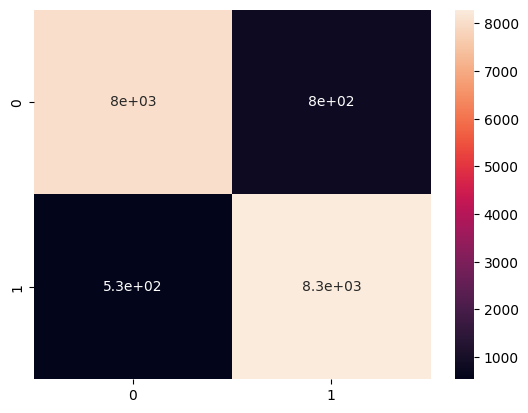

In [ ]:
## Creating Confusion Matrix and Visualizing through a HeatMap

confusion = confusion_matrix(red_ytest, red_ypredict)
print(confusion)
sns.heatmap(pd.DataFrame(confusion), annot=True)


In [ ]:
## Accuracy and Classification Report

red_Acc = accuracy_score(red_ytest,red_ypredict)*100
print("Accuracy of the Model is: ", round(red_Acc,3),'%')

red_report = classification_report(red_ytest,red_ypredict)
print("Classification Report:")
print(red_report)

Accuracy of the Model is:  92.465 %
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      8831
           1       0.91      0.94      0.93      8821

    accuracy                           0.92     17652
   macro avg       0.93      0.92      0.92     17652
weighted avg       0.93      0.92      0.92     17652



# **Comparing with Other Classification Models**

we have used the following Classification Methods:


1. Linear Discriminant Analysis(LDA)
2. Random Forest Classifier
3. Support Vector Machine(SVM)



# 1. Linear Discriminant Analysis(LDA)

In [ ]:
## Importing Necessary Libraries

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
## Reducing Data features using LDA

lda_xtrain, lda_xtest, lda_ytrain, lda_ytest = train_test_split(X,Y,test_size=0.25,random_state=0)
lda =  LinearDiscriminantAnalysis()
lda_1 =  LinearDiscriminantAnalysis()
F = lda.fit_transform(lda_xtrain,lda_ytrain)
F2 = lda.transform(lda_xtest)
F1 = lda_1.fit_transform(F,lda_ytrain)

In [ ]:
## Predicting the Class of reduced Test_Data using LDA

lda_ypredict = lda_1.predict(F2)
print(lda_ytest)
print(lda_ypredict)

[0 1 0 ... 0 1 1]
[1 1 1 ... 0 1 1]


[[7520 1311]
 [ 256 8565]]


<Axes: >

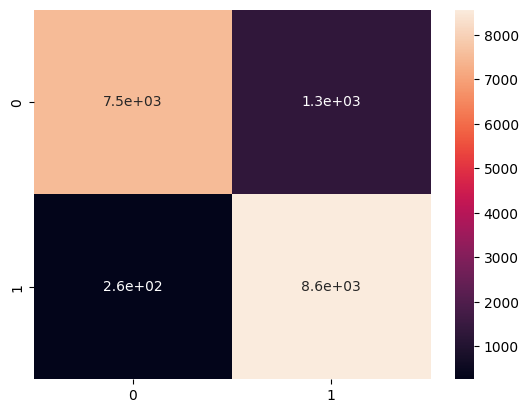

In [ ]:
## Confusion Matrix

lda_confusion = confusion_matrix(lda_ytest,lda_ypredict)
print(lda_confusion)
sns.heatmap(pd.DataFrame(lda_confusion), annot=True)

In [ ]:
## Accuracy and Classification Report

lda_Acc = accuracy_score(lda_ytest,lda_ypredict)*100
lda_report = classification_report(lda_ytest,lda_ypredict)
print("Accuracy of the Model is: ",round(lda_Acc,3),'%')
print("Classification Report: ")
print(lda_report)
print('*'*60)

Accuracy of the Model is:  91.123 %
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8831
           1       0.87      0.97      0.92      8821

    accuracy                           0.91     17652
   macro avg       0.92      0.91      0.91     17652
weighted avg       0.92      0.91      0.91     17652

************************************************************


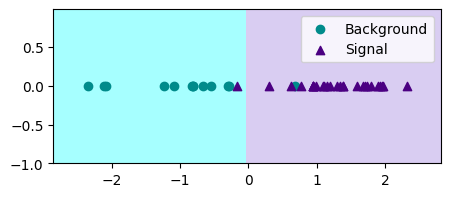

In [ ]:
## Visualizing the result

X_grid,Y_grid = np.meshgrid(np.arange(start = min(F2) - 1,
							stop = max(F2) + 1, step = 0.01),
					np.arange(start = -1,
							stop = 1, step = 0.01))
pr = lda_1.predict(X_grid[0].reshape(len(X_grid[0]),1))
pred=[]
for j in range(0,len(Y_grid)):
  pred.append(pr)
plt.figure(figsize=(5,2))
plt.contourf(X_grid, Y_grid, pred, alpha = 0.35, cmap = ListedColormap(('cyan', 'mediumpurple')))

indices = []
for i in range(0,len(F2)):
  indices.append(i)
indices = random.sample(indices,40)
F2_plot,lda_ytest_plot= [],[]
for ind in indices:
  F2_plot.append(F2[ind])
  lda_ytest_plot.append(lda_ytest[ind])

Xpz = []
Xp1 = []
for j in range(0,len(lda_ytest_plot)):
  if lda_ytest_plot[j] == 0:
    Xpz.append(F2_plot[j])
  if lda_ytest_plot[j] == 1:
    Xp1.append(F2_plot[j])
plt.scatter(Xpz, np.zeros(len(Xpz)), marker='o',label='Background', color='darkcyan')
plt.scatter(Xp1, np.zeros(len(Xp1)),  marker='^',label='Signal', color='indigo')
plt.xlim(min(F2_plot)-0.5,max(F2_plot)+0.5)
plt.legend()

# 2. Random Forest Classifier

In [ ]:
## Importing the required libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
## Creating Random Forest Model

rf_xtrain, rf_xtest, rf_ytrain, rf_ytest = train_test_split(X, Y, test_size=0.25, random_state=0)
rf_Model = RandomForestClassifier(n_estimators=59, random_state=0)
rf_Model.fit(rf_xtrain, rf_ytrain)

RandomForestClassifier(n_estimators=59, random_state=0)

In [ ]:
## Testing the Model using test_Data

rf_yprediction = rf_Model.predict(rf_xtest)
print(rf_ytest)
print(rf_yprediction)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]


[[8609  222]
 [  66 8755]]


<Axes: >

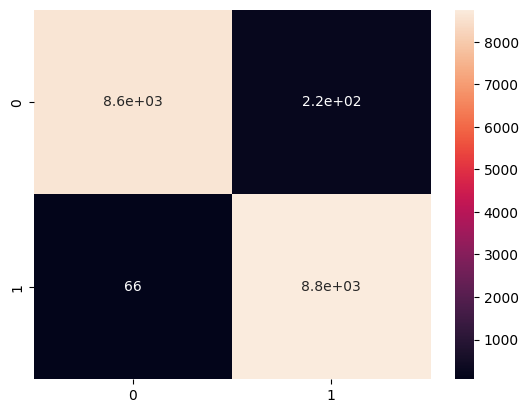

In [ ]:
## Confusion Matrix

rf_confusion = confusion_matrix(rf_ytest, rf_yprediction)
print(rf_confusion)
sns.heatmap(pd.DataFrame(rf_confusion), annot=True)

In [ ]:
## Accuracy and Classification Report

rf_Acc = accuracy_score(rf_ytest, rf_yprediction)*100
rf_report = classification_report(rf_ytest, rf_yprediction)
print("Accuracy of the Model is: ",round(rf_Acc,3),'%')
print("Classification Report: ")
print(rf_report)
print('*'*60)

Accuracy of the Model is:  98.368 %
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8831
           1       0.98      0.99      0.98      8821

    accuracy                           0.98     17652
   macro avg       0.98      0.98      0.98     17652
weighted avg       0.98      0.98      0.98     17652

************************************************************


17652
18 22
18 22


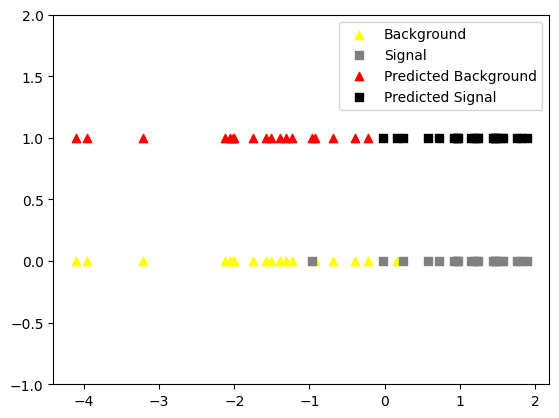

In [ ]:
## Visualizing the result

lda_rf_plot= LinearDiscriminantAnalysis()
X_lda = lda_rf_plot.fit_transform(rf_xtest,rf_ytest)
print(len(X_lda))
indices = []
for i in range(0,len(X_lda)):
  indices.append(i)
indices = random.sample(indices,40)
X_lda_plot,rf_ytest_plot,rf_yprediction_plot = [],[],[]
for ind in indices:
  X_lda_plot.append(X_lda[ind])
  rf_ytest_plot.append(rf_ytest[ind])
  rf_yprediction_plot.append(rf_yprediction[ind])

Xpz = []
Xp1 = []
for j in range(0,len(rf_ytest_plot)):
  if rf_ytest_plot[j] == 0:
    Xpz.append(X_lda_plot[j])
  if rf_ytest_plot[j] == 1:
    Xp1.append(X_lda_plot[j])
print(len(Xpz),len(Xp1))
plt.scatter(Xpz, np.zeros(len(Xpz)), marker='^',label='Background', color='yellow')
plt.scatter(Xp1, np.zeros(len(Xp1)),  marker='s',label='Signal', color='grey')
plt.legend()

Xpz = []
Xp1 = []
for j in range(0,len(rf_yprediction_plot)):
  if rf_yprediction_plot[j] == 0:
    Xpz.append(X_lda_plot[j])
  if rf_yprediction_plot[j] == 1:
    Xp1.append(X_lda_plot[j])
print(len(Xpz),len(Xp1))
plt.scatter(Xpz, np.ones(len(Xpz)), marker='^',label='Predicted Background', color='red')
plt.scatter(Xp1, np.ones(len(Xp1)),  marker='s',label='Predicted Signal', color='black')
plt.ylim(-1,2)
plt.legend()

**=> Random Forest Model for Reduced Data**

In [ ]:
## Reducing the data using LDA

rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
lda_rf = LinearDiscriminantAnalysis(n_components=1)
rf_lda_1 = LinearDiscriminantAnalysis()
X_train_lda = lda_rf.fit_transform(rf_X_train, rf_y_train)
X_test_lda = lda_rf.transform(rf_X_test)
F1 = rf_lda_1.fit_transform(X_train_lda,rf_y_train)

In [ ]:
## Creating New Random Forest Classifier Instance
rf_red_Model = RandomForestClassifier(n_estimators=59, random_state=0)
rf_red_Model.fit(X_train_lda, rf_y_train)

## Predicting the class of reduced data
rf_y_prediction = rf_red_Model.predict(X_test_lda)
print(rf_y_test)
print(rf_y_prediction)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 0 1]


[[7846  985]
 [ 975 7846]]


<Axes: >

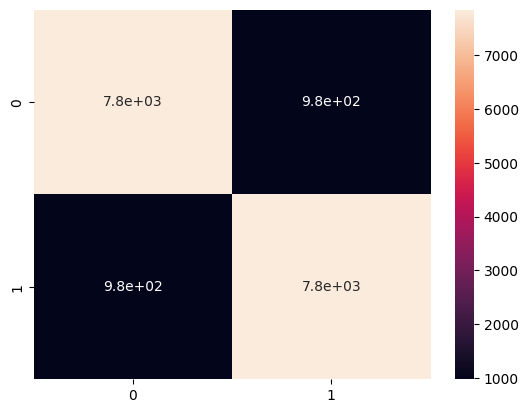

In [ ]:
## Confusion Matrix

rf_red_confusion = confusion_matrix(rf_y_test, rf_y_prediction)
print(rf_red_confusion)
sns.heatmap(pd.DataFrame(rf_red_confusion), annot=True)

In [ ]:
## Accuracy and Classification Report

rf_red_Acc = accuracy_score(rf_y_test, rf_y_prediction)*100
rf_red_report = classification_report(rf_y_test, rf_y_prediction)
print("Accuracy of the Model is: ",round(rf_red_Acc,3),'%')
print("Classification Report: ")
print(rf_red_report)
print('*'*60)

Accuracy of the Model is:  88.896 %
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8831
           1       0.89      0.89      0.89      8821

    accuracy                           0.89     17652
   macro avg       0.89      0.89      0.89     17652
weighted avg       0.89      0.89      0.89     17652

************************************************************


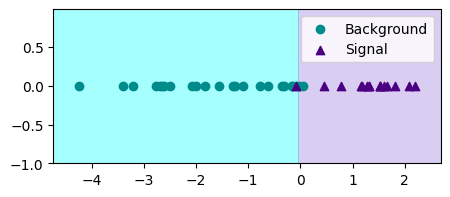

In [ ]:
## Visualization of Result
from matplotlib.colors import ListedColormap

X_grid,Y_grid = np.meshgrid(np.arange(start = min(X_test_lda) - 1,
							stop = max(X_test_lda) + 1, step = 0.01),
					np.arange(start = -1,
							stop = 1, step = 0.01))
pr = rf_lda_1.predict(X_grid[0].reshape(len(X_grid[0]),1))
pred=[]
for j in range(0,len(Y_grid)):
  pred.append(pr)
plt.figure(figsize=(5,2))
plt.contourf(X_grid, Y_grid, pred, alpha = 0.35, cmap = ListedColormap(('cyan', 'mediumpurple')))

indices = []
for i in range(0,len(X_test_lda)):
  indices.append(i)
indices = random.sample(indices,40)
X_test_lda_plot,rf_y_test_plot= [],[]
for ind in indices:
  X_test_lda_plot.append(X_test_lda[ind])
  rf_y_test_plot.append(rf_y_test[ind])

Xpz = []
Xp1 = []
for j in range(0,len(rf_y_test_plot)):
  if rf_y_test_plot[j] == 0:
    Xpz.append(X_test_lda_plot[j])
  if rf_y_test_plot[j] == 1:
    Xp1.append(X_test_lda_plot[j])
plt.scatter(Xpz, np.zeros(len(Xpz)), marker='o',label='Background', color='darkcyan')
plt.scatter(Xp1, np.zeros(len(Xp1)),  marker='^',label='Signal', color='indigo')
plt.xlim(min(X_test_lda_plot)-0.5,max(X_test_lda_plot)+0.5)
plt.legend()

# 3. Support Vector Machine(SVM)

In [ ]:
## Importing the required libraries

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
## Creating SVM Model

s_xtrain, s_xtest, s_ytrain, s_ytest = train_test_split(X, Y, test_size=0.25, random_state=0)
classifier = SVC()
classifier.fit(s_xtrain, s_ytrain)

SVC()

In [ ]:
## Testing the Model

s_ypred = classifier.predict(s_xtest)
print(s_ytest)
print(s_ypred)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]


[[8294  537]
 [   0 8821]]


<Axes: >

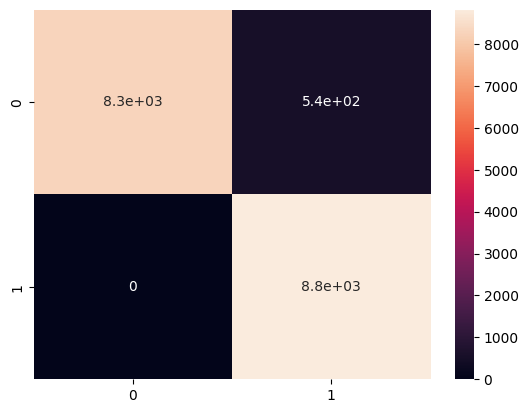

In [ ]:
## Confusion Matrix

s_confusion = confusion_matrix(s_ytest, s_ypred)
print(s_confusion)
sns.heatmap(pd.DataFrame(s_confusion), annot=True)

In [ ]:
## Accuracy and Classification Report

s_Acc = accuracy_score(s_ytest, s_ypred)*100
s_report = classification_report(s_ytest, s_ypred)
print("Accuracy of the Model is: ",round(s_Acc,3),'%')
print("Classification Report: ")
print(s_report)
print('*'*60)

Accuracy of the Model is:  96.958 %
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8831
           1       0.94      1.00      0.97      8821

    accuracy                           0.97     17652
   macro avg       0.97      0.97      0.97     17652
weighted avg       0.97      0.97      0.97     17652

************************************************************


17652
22 18
21 19


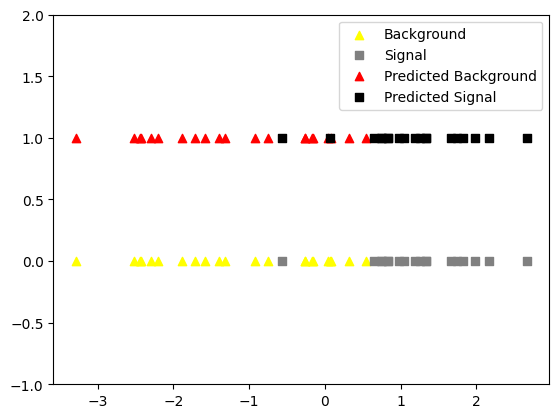

In [ ]:
## Visualizing the results

lda_s_plot= LinearDiscriminantAnalysis()
X_lda = lda_s_plot.fit_transform(s_xtest,s_ytest)
print(len(X_lda))
indices = []
for i in range(0,len(X_lda)):
  indices.append(i)
indices = random.sample(indices,40)
X_lda_plot,s_ytest_plot,s_ypred_plot = [],[],[]
for ind in indices:
  X_lda_plot.append(X_lda[ind])
  s_ytest_plot.append(s_ytest[ind])
  s_ypred_plot.append(s_ypred[ind])

Xpz = []
Xp1 = []
for j in range(0,len(s_ytest_plot)):
  if s_ytest_plot[j] == 0:
    Xpz.append(X_lda_plot[j])
  if s_ytest_plot[j] == 1:
    Xp1.append(X_lda_plot[j])
print(len(Xpz),len(Xp1))
plt.scatter(Xpz, np.zeros(len(Xpz)), marker='^',label='Background', color='yellow')
plt.scatter(Xp1, np.zeros(len(Xp1)),  marker='s',label='Signal', color='grey')
plt.legend()

Xpz = []
Xp1 = []
for j in range(0,len(s_ypred_plot)):
  if s_ypred_plot[j] == 0:
    Xpz.append(X_lda_plot[j])
  if s_ypred_plot[j] == 1:
    Xp1.append(X_lda_plot[j])
print(len(Xpz),len(Xp1))
plt.scatter(Xpz, np.ones(len(Xpz)), marker='^',label='Predicted Background', color='red')
plt.scatter(Xp1, np.ones(len(Xp1)),  marker='s',label='Predicted Signal', color='black')
plt.ylim(-1,2)
plt.legend()

**=> SVM Model for Reduced Data**

In [ ]:
## Reducing the data using LDA

s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
lda_s = LinearDiscriminantAnalysis(n_components=1)
s_lda_1 = LinearDiscriminantAnalysis()
X_train_lda = lda_s.fit_transform(s_X_train, s_y_train)
X_test_lda = lda_s.transform(s_X_test)
F1 = s_lda_1.fit_transform(X_train_lda,s_y_train)

In [ ]:
## Creating New SVM Instance
s_red_Model = SVC()
s_red_Model.fit(X_train_lda, s_y_train)

## Predicting the class of reduced data
s_y_prediction = s_red_Model.predict(X_test_lda)
print(s_y_test)
print(s_y_prediction)

[0 1 0 ... 0 1 1]
[0 1 1 ... 0 1 1]


[[7972  859]
 [ 475 8346]]


<Axes: >

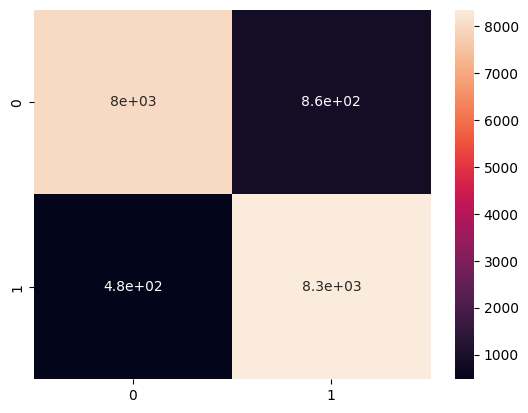

In [ ]:
## Confusion Matrix

s_red_confusion = confusion_matrix(s_y_test, s_y_prediction)
print(s_red_confusion)
sns.heatmap(pd.DataFrame(s_red_confusion), annot=True)

In [ ]:
## Accuracy and Classification Report

s_red_Acc = accuracy_score(s_y_test, s_y_prediction)*100
s_red_report = classification_report(s_y_test, s_y_prediction)
print("Accuracy of the Model is: ",round(s_red_Acc,3),'%')
print("Classification Report: ")
print(s_red_report)
print('*'*60)

Accuracy of the Model is:  92.443 %
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      8831
           1       0.91      0.95      0.93      8821

    accuracy                           0.92     17652
   macro avg       0.93      0.92      0.92     17652
weighted avg       0.93      0.92      0.92     17652

************************************************************


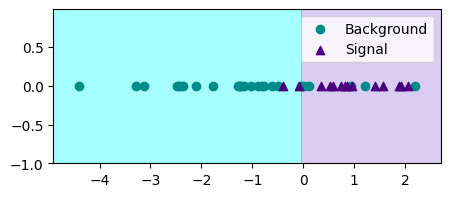

In [ ]:
## Visualization of the result

from matplotlib.colors import ListedColormap

X_grid,Y_grid = np.meshgrid(np.arange(start = min(X_test_lda) - 1,
							stop = max(X_test_lda) + 1, step = 0.01),
					np.arange(start = -1,
							stop = 1, step = 0.01))
pr = s_lda_1.predict(X_grid[0].reshape(len(X_grid[0]),1))
pred=[]
for j in range(0,len(Y_grid)):
  pred.append(pr)
plt.figure(figsize=(5,2))
plt.contourf(X_grid, Y_grid, pred, alpha = 0.35, cmap = ListedColormap(('cyan', 'mediumpurple')))

indices = []
for i in range(0,len(X_test_lda)):
  indices.append(i)
indices = random.sample(indices,40)
X_test_lda_plot,s_y_test_plot= [],[]
for ind in indices:
  X_test_lda_plot.append(X_test_lda[ind])
  s_y_test_plot.append(s_y_test[ind])

Xpz = []
Xp1 = []
for j in range(0,len(s_y_test_plot)):
  if s_y_test_plot[j] == 0:
    Xpz.append(X_test_lda_plot[j])
  if s_y_test_plot[j] == 1:
    Xp1.append(X_test_lda_plot[j])
plt.scatter(Xpz, np.zeros(len(Xpz)), marker='o',label='Background', color='darkcyan')
plt.scatter(Xp1, np.zeros(len(Xp1)),  marker='^',label='Signal', color='indigo')
plt.xlim(min(X_test_lda_plot)-0.5,max(X_test_lda_plot)+0.5)
plt.legend()

<BarContainer object of 7 artists>

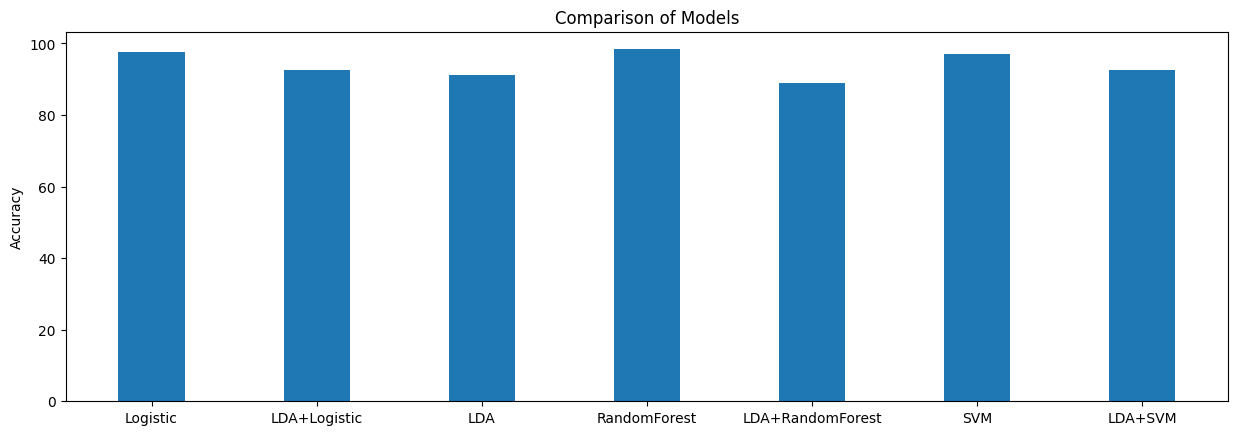

In [ ]:
## Comparison plot

Models = ['Logistic','LDA+Logistic','LDA','RandomForest','LDA+RandomForest','SVM','LDA+SVM']
Accuracies = [log_Acc,red_Acc,lda_Acc,rf_Acc,rf_red_Acc,s_Acc,s_red_Acc]
plt.figure().set_figwidth(15)
plt.title('Comparison of Models')
plt.ylabel('Accuracy')
plt.bar(Models,Accuracies, width=0.4)